In [103]:
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, pairwise_distances_argmin_min

In [104]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people ( min_faces_per_person =70, resize =1)

In [105]:
for name in lfw_people.target_names:
 print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [106]:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 11750
n_classes: 7


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test,_names_train, names_test = train_test_split (X, y, target_names[y], 
                                                                              test_size = 0.2, random_state =42)


In [142]:
n_components = 150

pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


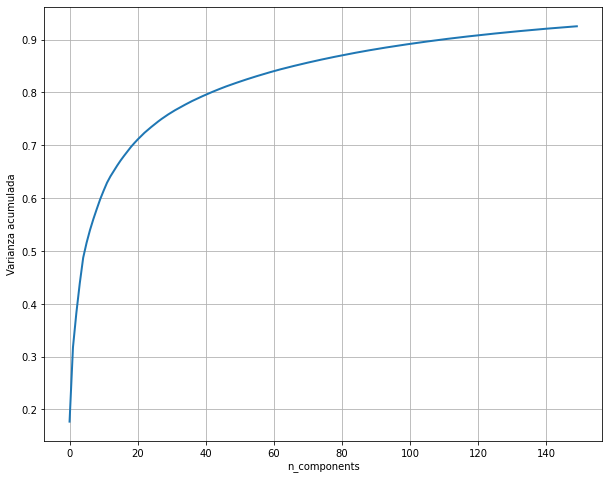

In [143]:
# varianza explicada
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.grid(), plt.axis('tight'), plt.xlabel('n_components'), plt.ylabel('Varianza acumulada')
plt.show()

In [144]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

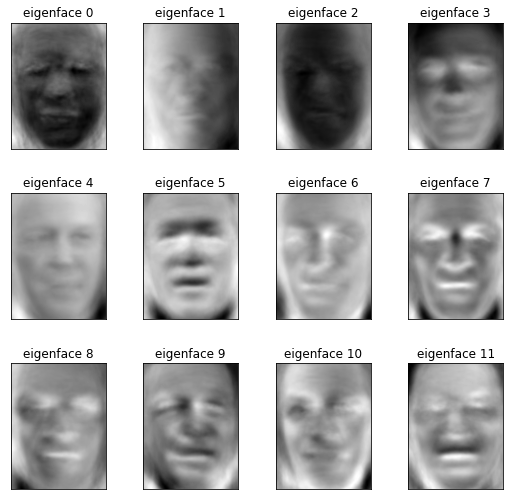

In [145]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

In [77]:
def calculate_eigenfaces(X, n_components):
    # Calcular la matriz de covarianza 
    mean_X = np.mean(X, axis=0)
    S = np.dot((X - mean_X).T, X - mean_X)

    # Calcular los autovalores y autovectores 
    eigenvalues, eigenvectors = np.linalg.eigh(S)

    # Ordenar los autovectores
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = eigenvectors[:, :n_components]

    return selected_eigenvectors


In [78]:
def plot_eigenfaces(eigenfaces, h, w, n_row=3, n_col=4):
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[1])]

    # Función para visualizar eigenfaces
    def plot_gallery(images, titles, n_row, n_col):
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(images[:, i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

    # Visualizar las eigenfaces
    plot_gallery(eigenfaces, eigenface_titles, n_row, n_col)
    plt.show()

In [58]:
from sklearn.datasets import fetch_lfw_people

# Cargar el conjunto de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
X = lfw_people.data
n_samples, h, w = lfw_people.images.shape
n_components = 60

In [59]:
# Calcular las eigenfaces
eigenfaces = calculate_eigenfaces(X, n_components)


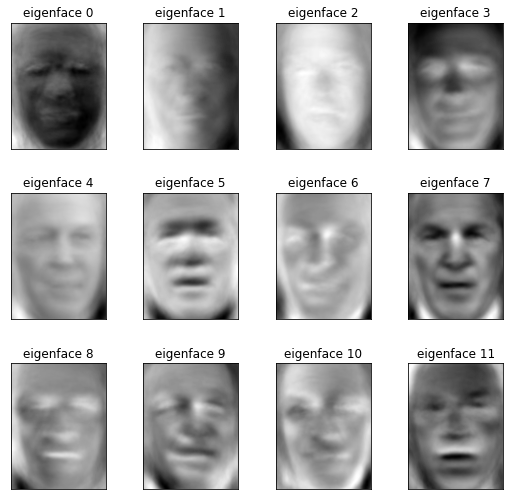

In [60]:
# Visualizar las eigenfaces
plot_eigenfaces(eigenfaces, h, w)

In [72]:
def calculate_eigenfaces_k(X, n_components):
    # Calcular la matriz de covarianza S
    mean_X = np.mean(X, axis=0)
    K = np.dot(X,X.T)

    # Calcular los autovalores y autovectores
    eigenvalues, eigenvectors = np.linalg.eigh(K)

    # Ordenar los autovectores
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = eigenvectors[:, :n_components]

    return selected_eigenvectors

In [73]:
def plot_eigenfaces(eigenfaces, h, w, n_row=3, n_col=4):
    eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[1])]

    # Función para visualizar eigenfaces
    def plot_gallery(images, titles, n_row, n_col):
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(images[:, i].reshape((h, w)), cmap=plt.cm.gray)
            plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

    # Visualizar las eigenfaces
    plot_gallery(eigenfaces, eigenface_titles, n_row, n_col)
    plt.show()

In [74]:
from sklearn.datasets import fetch_lfw_people

# Cargar el conjunto de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)
X = lfw_people.data
n_samples, h, w = lfw_people.images.shape
n_components = 60


In [75]:
# Calcular las eigenfaces
eigenfaces = calculate_eigenfaces(X, n_components)


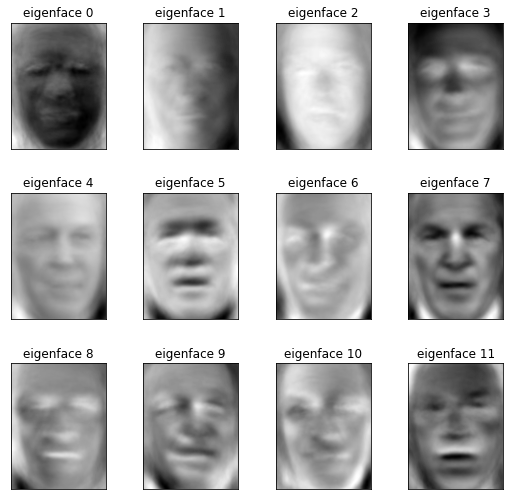

In [76]:
# Visualizar las eigenfaces
plot_eigenfaces(eigenfaces, h, w)

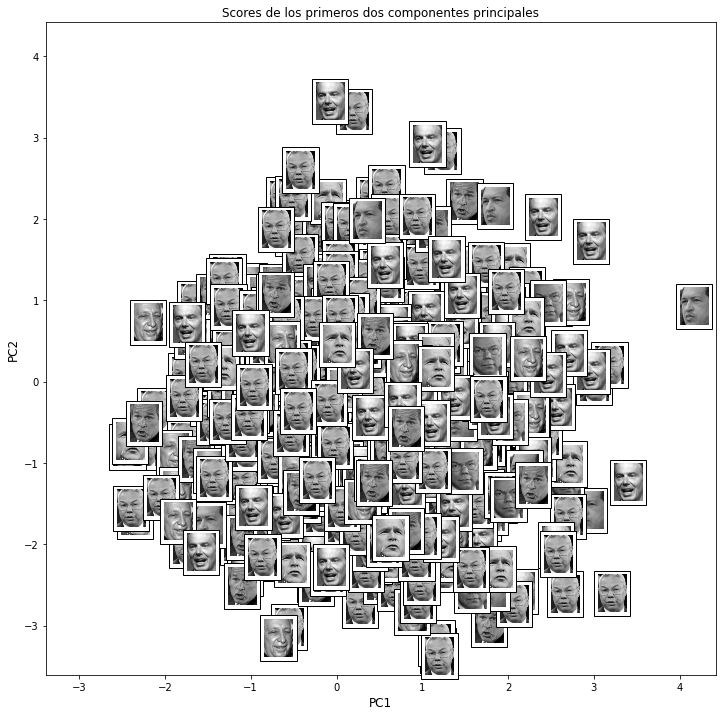

In [146]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

imagenes_train = lfw_people.images[y_train]

# Crear el gráfico
fig, ax = plt.subplots()

for x0, y0, image in zip(X_train_pca[:, 0], X_train_pca[:, 1], imagenes_train):
    imagebox = OffsetImage(image, zoom=0.3, cmap=plt.cm.gray)
    ab = AnnotationBbox(imagebox, (x0, y0), xybox=(30., -30.),
                        xycoords='data', boxcoords='offset points')                                  
    ax.add_artist(ab)

ax.set_xlim(X_train_pca[:, 0].min()-0.6, X_train_pca[:, 0].max()+0.6)
ax.set_ylim(X_train_pca[:, 1].min()-0.6, X_train_pca[:, 1].max()+0.6)
#plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('Scores de los primeros dos componentes principales', size=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Scores de los primeros dos componentes principales')
fig.set_size_inches(12, 12)
plt.show()

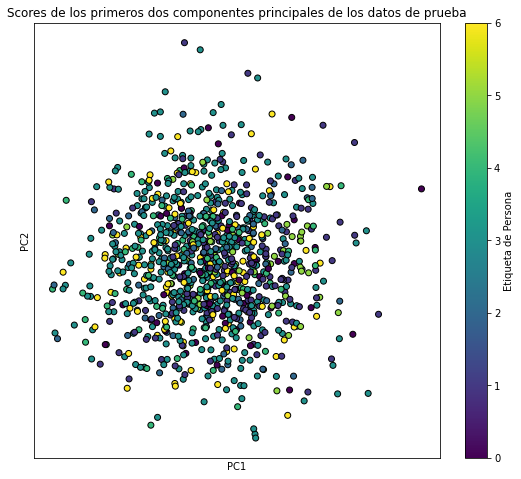

In [147]:
# Visualizar los scores de los primeros dos componentes principales
X_train_pca = pca.transform(X_train)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scores de los primeros dos componentes principales de los datos de prueba')

# Agregar la barra de etiquetas
plt.colorbar(scatter, ticks=range(len(target_names)), label='Etiqueta de Persona')
plt.xticks([])
plt.yticks([])

plt.show()

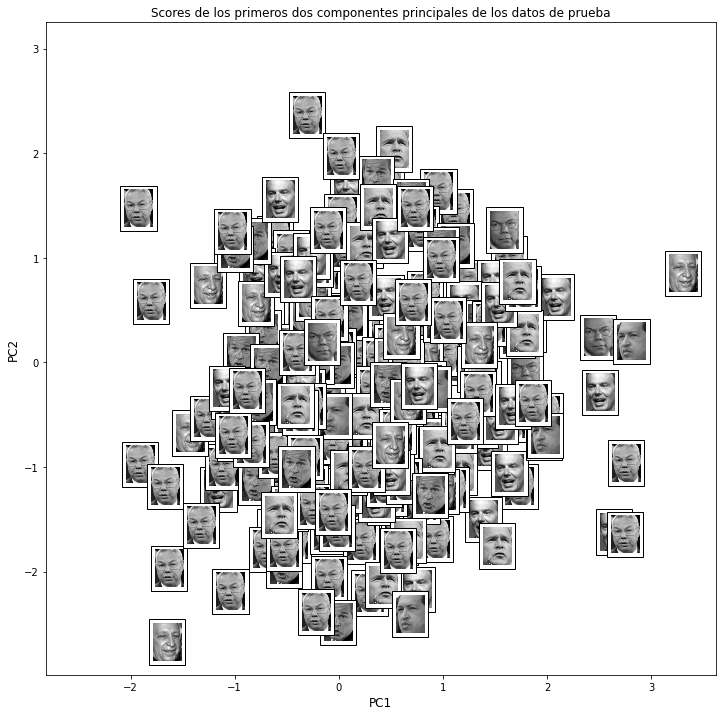

In [148]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

imagenes_test = lfw_people.images[y_test]

# Crear el gráfico
fig, ax = plt.subplots()

for x0, y0, image in zip(X_test_pca[:, 0], X_test_pca[:, 1], imagenes_test):
    imagebox = OffsetImage(image, zoom=0.3, cmap=plt.cm.gray)
    ab = AnnotationBbox(imagebox, (x0, y0), xybox=(30., -30.),
                        xycoords='data', boxcoords='offset points')                                  
    ax.add_artist(ab)

ax.set_xlim(X_test_pca[:, 0].min()-0.6, X_test_pca[:, 0].max()+0.6)
ax.set_ylim(X_test_pca[:, 1].min()-0.6, X_test_pca[:, 1].max()+0.6)
#plt.xlabel('PC1', size=20), plt.ylabel('PC2', size=20), plt.title('Scores de los primeros dos componentes principales', size=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Scores de los primeros dos componentes principales de los datos de prueba')
fig.set_size_inches(12, 12)
plt.show()

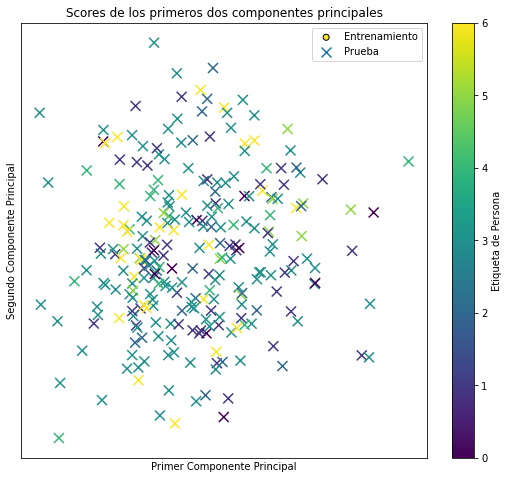

In [119]:
# Proyectar
X_test_pca = pca.transform(X_test)

# Visualizar los scores
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
#scatter_train = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis')
scatter_test = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='x', s=100, cmap='viridis')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Scores de los primeros dos componentes principales')

# Agregar etiquetas
plt.colorbar(scatter_train, ticks=range(len(target_names)), label='Etiqueta de Persona')
plt.xticks([])
plt.yticks([])
plt.legend([scatter_train, scatter_test], ['Entrenamiento', 'Prueba'], loc='upper right')

plt.show()

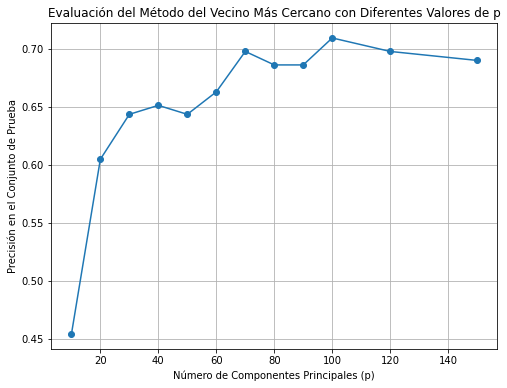

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Rango de valores de p para evaluar
p_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150]
accuracies = []

for p in p_values:
    # Aplica PCA con el valor de p actual
    pca = PCA(n_components=p, svd_solver='randomized', whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Entrenar el clasificador de vecinos más cercanos
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train_pca, y_train)
    
    # Realizar predicciones 
    y_pred = knn.predict(X_test_pca)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Visualizar la precisión en función de los valores de p
plt.figure(figsize=(8, 6))
plt.plot(p_values, accuracies, marker='o')
plt.xlabel('Número de Componentes Principales (p)')
plt.ylabel('Precisión en el Conjunto de Prueba')
plt.title('Evaluación del Método del Vecino Más Cercano con Diferentes Valores de p')
plt.grid(True)
plt.show()


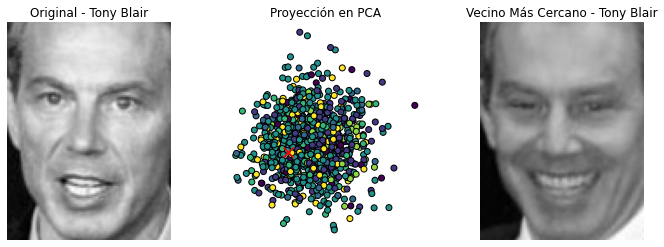

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, pairwise_distances_argmin_min

# Elegir p 
optimal_p = 70

# Entrenar el clasificador
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
random_index = np.random.randint(0, len(X_test))
sample_test_image = X_test[random_index]
sample_test_label = y_test[random_index]
sample_test_name = names_test[random_index]
# Proyectar la muestra
sample_test_pca = pca.transform([sample_test_image])

# Encontrar el vecino más cercano
nearest_neighbor_index = pairwise_distances_argmin_min(sample_test_pca, X_train_pca)[0][0]
nearest_neighbor_image = X_train[nearest_neighbor_index]
nearest_neighbor_label = y_train[nearest_neighbor_index]
nearest_neighbor_name = _names_train[nearest_neighbor_index]

# Visualizar las imágenes
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(sample_test_image.reshape((125, 94)), cmap='gray')
plt.title(f'Original - {sample_test_name}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis')
plt.scatter(sample_test_pca[:, 0], sample_test_pca[:, 1], c='red', marker='x', s=100)
plt.title('Proyección en PCA')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(nearest_neighbor_image.reshape((125, 94)), cmap='gray')
plt.title(f'Vecino Más Cercano - {nearest_neighbor_name}')
plt.axis('off')

plt.show()
